In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#read the paquet files
y_train = pd.read_parquet(r"C:\Users\USER\Documents\ADIA LAB STRUCTURAL BREAK HACKATHON\data\raw\y_train.parquet", engine='pyarrow')
x_train = pd.read_parquet(r"C:\Users\USER\Documents\ADIA LAB STRUCTURAL BREAK HACKATHON\data\raw\X_train.parquet", engine='pyarrow')
y_test = pd.read_parquet(r"C:\Users\USER\Documents\ADIA LAB STRUCTURAL BREAK HACKATHON\data\raw\y_test.reduced.parquet", engine='pyarrow')
x_test = pd.read_parquet(r"C:\Users\USER\Documents\ADIA LAB STRUCTURAL BREAK HACKATHON\data\raw\X_test.reduced.parquet", engine='pyarrow')


In [2]:
print(y_train.shape)
print(x_train.shape)

(10001, 1)
(23715734, 2)


In [3]:
print(y_train.head())
print(x_train.head())

    structural_breakpoint
id                       
0                   False
1                   False
2                    True
3                   False
4                   False
            value  period
id time                  
0  0    -0.005564       0
   1     0.003705       0
   2     0.013164       0
   3     0.007151       0
   4    -0.009979       0


In [18]:
print(x_train.columns)

Index(['value', 'period'], dtype='object')


In [21]:
y_train

,structural_breakpoint
id,
0,False
1,False
2,True
3,False
4,False
...,...
9996,False
9997,False
9998,False


In [22]:
x_train

value  period
id    time                  
0     0    -0.005564       0
      1     0.003705       0
      2     0.013164       0
      3     0.007151       0
      4    -0.009979       0
...              ...     ...
10000 2134  0.001137       1
      2135  0.003526       1
      2136  0.000687       1
      2137  0.001640       1
      2138  0.001074       1

[23715734 rows x 2 columns]

In [23]:
x_train.columns

Index(['value', 'period'], dtype='object')

In [24]:
y_train.columns

Index(['structural_breakpoint'], dtype='object')

In [ ]:
#to obtain the number of unique time series in the training set
#this assumes that the 'id' column is the index of the DataFrame

num_series = x_train.index.get_level_values("id").nunique()
print(f"There are {num_series} unique time series in the training set.")


There are 10001 unique time series in the training set.


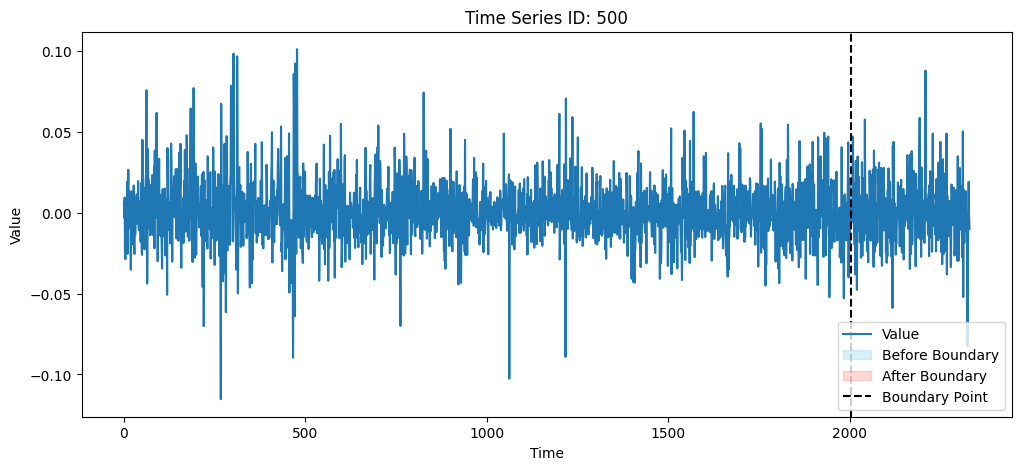

In [4]:
# a function to plot a time series for a given series ID (we have 10000 ids)
import matplotlib.pyplot as plt

def plot_time_series(df, series_id):
    series_data = df.loc[series_id]
    
    plt.figure(figsize=(12, 5))
    plt.plot(series_data.index, series_data['value'], label='Value')
    
    # Highlight before/after boundary periods with colors
    before = series_data[series_data['period'] == 0]
    after = series_data[series_data['period'] == 1]
    plt.fill_between(before.index, before['value'], color='skyblue', alpha=0.3, label='Before Boundary')
    plt.fill_between(after.index, after['value'], color='salmon', alpha=0.3, label='After Boundary')
    
    # Boundary time (where period changes from 0 to 1)
    boundary_time = after.index.min()
    plt.axvline(boundary_time, color='black', linestyle='--', label='Boundary Point')
    
    plt.title(f'Time Series ID: {series_id}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Usage:
plot_time_series(x_train, series_id=500)
